In [99]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [100]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

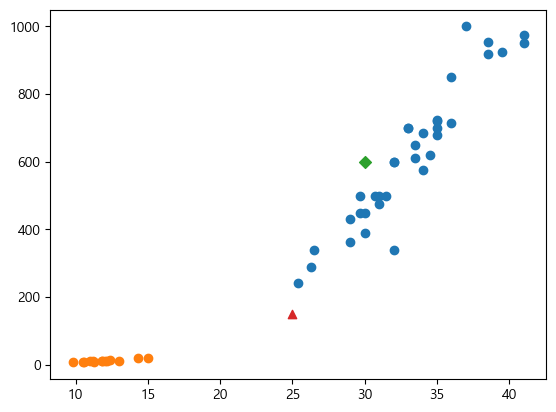

In [101]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')

In [102]:
len(bream_length) # 도미데이터 - 35
# len(smelt_length) # 빙어데이터 - 14

35

In [103]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
len(length)
len(weight)
results = [1]*35+[0]*14 # 1:도미, 0:빙어

# zip() : 반복해서 각각list데이터를 1개씩 뽑아서 전달해줌.
# datas = [ [l,w,r] for l,w,r in zip(length,weight,results)]
datas = [ [l,w] for l,w in zip(length,weight)]
df = pd.DataFrame(datas)

In [104]:
# 랜덤숫자 생성
idx = [i for i in range(49)]
random.shuffle(idx)
# idx

In [105]:
# 파이썬 random함수 사용해서 전처리
train_input = [ datas[i] for i in idx[:35] ] # 35
test_input = [ datas[i] for i in idx[35:] ]  # 14
train_target = [ results[i] for i in idx[:35] ] # 35
test_target = [ results[i] for i in idx[35:] ]  # 14

In [106]:
# 1. 데이터 전처리 - pandas사용
# train_input = df.iloc[idx[:35],:-1]
# test_input = df.iloc[idx[35:],:-1]
# train_target = df.iloc[idx[:35],2]
# test_target = df.iloc[idx[35:],2]

In [107]:
df_train =pd.DataFrame(train_input)
df_train.head(1)
df_test =pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,12.0,9.8


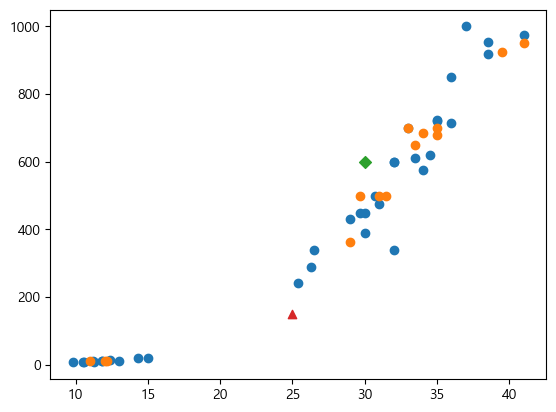

In [108]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')


In [109]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 데이터 예측하기
pre = clf.predict(test_input)
print("예측데이터값 : ",pre)

예측데이터값 :  [0 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [110]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌.
distances,indexs = clf.kneighbors([[25,150]])

In [111]:
df_train

,0,1
0,14.3,19.7
1,35.0,725.0
2,37.0,1000.0
3,30.0,390.0
4,29.0,430.0
5,26.3,290.0
6,41.0,975.0
7,38.5,955.0
8,32.0,340.0
9,11.8,9.9


In [114]:
indexs

array([[16, 27,  0, 26, 20]], dtype=int64)

In [125]:
df_train.iloc[indexs[0],0]

16    25.4
27    15.0
0     14.3
26    12.4
20    13.0
Name: 0, dtype: float64

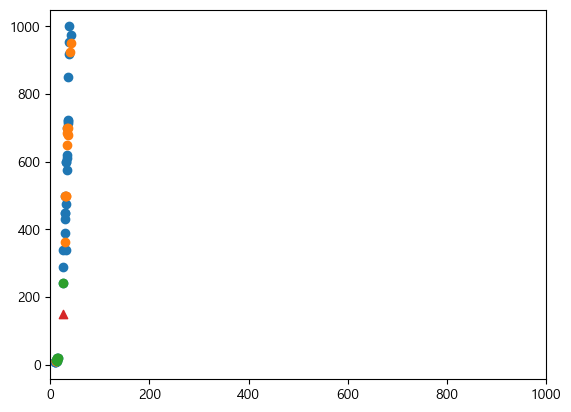

In [127]:
plt.xlim(0,1000)
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])
plt.scatter(25,150,marker='^')

In [ ]:
# 정답률 구하기
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [ ]:
# 길이 30,무게 600 고기 무엇인지 판단하시오.
# [30,600]
# 데이터 예측하기
pre = clf.predict([[30,600]])
print("예측데이터값 : ",pre)

예측데이터값 :  [1]


In [ ]:
# 길이 25,무게 150 고기 무엇인지 판단하시오.
# [25,150]
pre = clf.predict([[25,150]])
print("예측데이터값 : ",pre)

예측데이터값 :  [0]
